# Scraping Multiples Pages of IMDB at a Time to Fetch top 1000 Movies

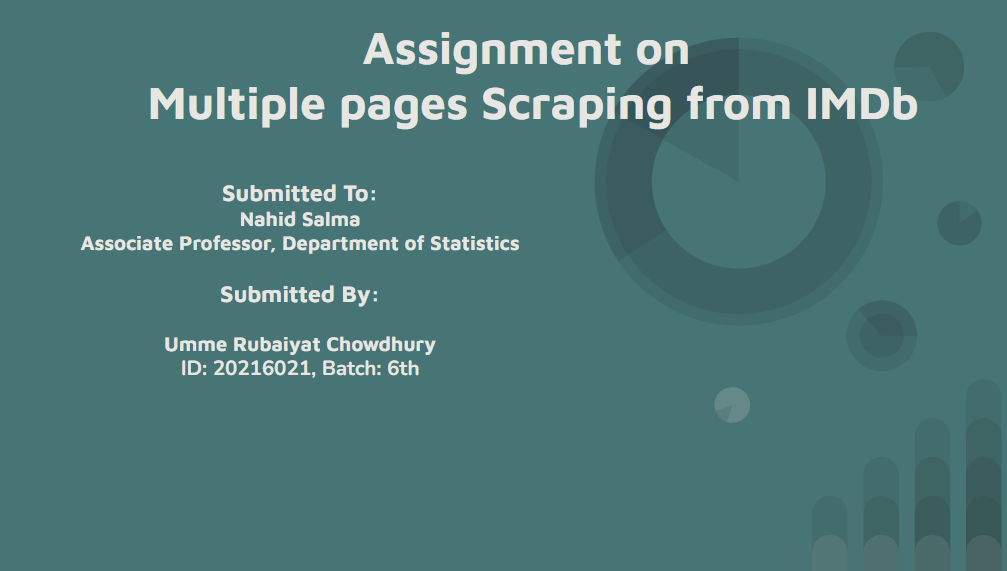

In [1]:
#importing the libraries needed 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [2]:
#Declaring the headers 
headers = {"Accept-Language": "en-US,en;q=0.5"}


In [3]:
#Here I have declared the list of empty variables, So that I can append the data overall

movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []

In [4]:
#According to the instructions, I need to scarch data for more than 3 pages, so I have decided to scrach 10 pages
#so here I have defined the array from 1st page to 10th page from the url

#creating an array of values and passing it in the url for dynamic webpages
pages = np.arange(1,1000,100)


# Used Methodology:

**Sleep Function:**
Some websites can block access to prevent web scraping, that can be easily detected if your Python script is sending multiple requests in a short period of time.

To not get banned you can try to add random delays between queries For this you can use the Python’s sleep() function hat suspends (waits) execution of the current thread for a given number of seconds with the randint() function that returns a random integer.

In [5]:
#the whole core of the script
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})

    sleep(randint(2,8))
    for store in movie_data:
      # Name of the Movies
        name = store.h3.a.text
        movie_name.append(name)

        # Release year of the Movies
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        year.append(year_of_release)
        
        # Duration of the Movies
        runtime = store.p.find("span", class_ = 'runtime').text
        time.append(runtime)
        
        # Rating of the Movies
        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        # Meta Score of the Movies
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else "****"
        metascore.append(meta)
        
         
        value = store.find_all('span', attrs = {'name': "nv"})
        
        # Votes of the Movies
        vote = value[0].text
        votes.append(vote)
        
        # Gross Value of the Movies
        grosses = value[1].text if len(value)>1 else '%^%^%^'
        gross.append(grosses)
        
        # Description of the Movies  
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        description.append(description_)



In [6]:
#creating a dataframe 
movie_list = pd.DataFrame({ "Movie Name": movie_name, "Year of Release" : year, "Watch Time": time,"Movie Rating": rating, "Meatscore of movie": metascore, "Votes" : votes, "Gross": gross, "Description": description  })

In [7]:
movie_list.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,81,"2,659,445",$28.34M,Two imprisoned men bond over a number of years...
1,The Godfather,(1972),175 min,9.2,100,"1,843,054",$134.97M,The aging patriarch of an organized crime dyna...
2,Kantara,(2022),148 min,9.1,****,"64,244",%^%^%^,It involves culture of Kambla and Bhootha Kola...
3,The Dark Knight,(2008),152 min,9.0,84,"2,632,254",$534.86M,When the menace known as the Joker wreaks havo...
4,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"1,833,736",$377.85M,Gandalf and Aragorn lead the World of Men agai...


In [9]:
# #saving the data in excel format
movie_list.to_excel("Top 1000 IMDb movies.xlsx")


In [10]:
#saving the data in csv format
movie_list.to_csv("Top 1000 IMDb movies.csv")